In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\reza\AppData\Roaming\Python\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
C:\Users\reza\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\reza\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in 

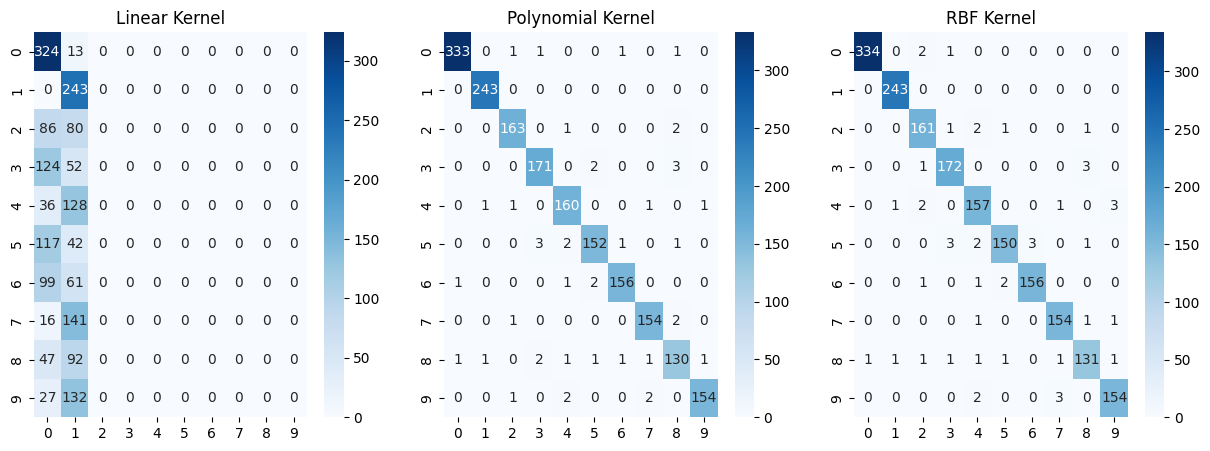

Accuracy (Linear Kernel): 0.30483870967741933
Accuracy (Polynomial Kernel): 0.9763440860215054
Accuracy (RBF Kernel): 0.9741935483870968


In [3]:


# Load USPS dataset
usps = datasets.fetch_openml(name="usps", version=2)

# Preprocess and split the dataset
X = usps.data.astype("float32") / 255.0
y = usps.target.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate_svm(kernel, **kwargs):
    svm_classifier = SVC(kernel=kernel, **kwargs)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy, conf_matrix, classification_rep

accuracy_linear, conf_matrix_linear, _ = train_and_evaluate_svm(kernel="linear", C=1.0)

accuracy_poly, conf_matrix_poly, _ = train_and_evaluate_svm(kernel="poly", degree=3, C=1.0)

accuracy_rbf, conf_matrix_rbf, _ = train_and_evaluate_svm(kernel="rbf", C=1.0)

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Linear Kernel")

sns.heatmap(conf_matrix_poly, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Polynomial Kernel")

sns.heatmap(conf_matrix_rbf, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("RBF Kernel")

plt.show()

# Compare Accuracy
print(f"Accuracy (Linear Kernel): {accuracy_linear}")
print(f"Accuracy (Polynomial Kernel): {accuracy_poly}")
print(f"Accuracy (RBF Kernel): {accuracy_rbf}")
